In [1]:
import pandas as pd
import seaborn as sns
penguins = sns.load_dataset("penguins")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [4]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

### Test/train split

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [6]:
before = len(penguins["bill_length_mm"])
after = len(penguins["bill_length_mm"].dropna())

print(before)
print(after)

344
342


### Trainset

In [7]:
features= ['bill_length_mm','bill_depth_mm']
dt = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features].fillna(penguins_train.mean()), penguins_train['species'])

DecisionTreeClassifier(max_depth=2)

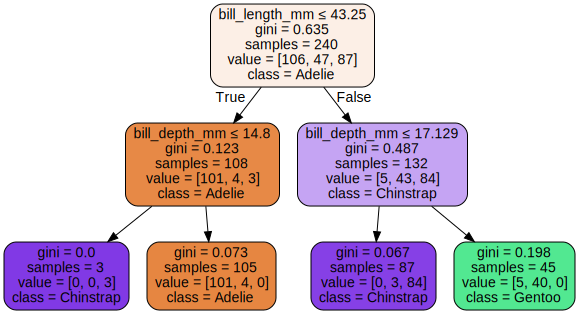

In [8]:
plot_tree_classification(dt, features, penguins_train.species.unique())

In [9]:
predictionsOnTrainset = dt.predict(penguins_train[features].fillna(penguins_train.mean()))
calculate_accuracy(predictionsOnTrainset, penguins_train.species)

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
print("Accuracy on training set " + str(accuracyTrain))

Accuracy on training set 0.95


### Testset

In [10]:
dt.fit(penguins_test[features].fillna(penguins_test.mean()), penguins_test['species'])

DecisionTreeClassifier(max_depth=2)

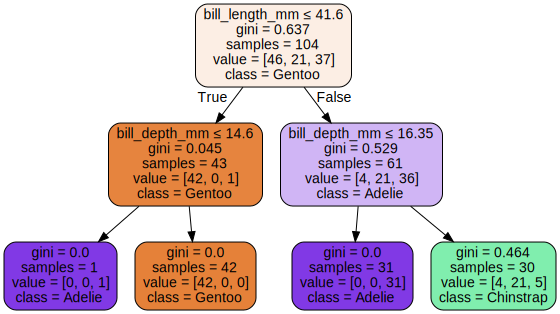

In [11]:
plot_tree_classification(dt, features, penguins_test.species.unique())

In [12]:
predictionsOnTestset = dt.predict(penguins_test[features].fillna(penguins_test.mean()))
calculate_accuracy(predictionsOnTestset, penguins_test.species)

accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)
print("Accuracy on testing set " + str(accuracyTest))

Accuracy on testing set 0.9134615384615384


### Difference Test/Train

Er zit een klein verschil tussen de test en de train set. maar de Testset komt wel in de buurt van de Trainset. er is dus wel een verband aanwezig, voor nieuwe data die nog niet gezien is.